In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('max_colwidth', 800)

In [11]:
results = [file for file in os.listdir('../Data') if 'result' in file]
df_list = []
for result in results:
    df = pd.read_csv('../Data/'+result,na_values=0)
    df['train_type'] = 'base' if 'base' in result else ('start' if 'start' in result else ('2stage' if '2stage' in result else 'org'))
    df['file_name'] = result
    df_list.append(df)
df = pd.concat(df_list,ignore_index=True)#.fillna(1e4)

In [13]:
pd.isnull(df['type']).sum()

90

In [12]:
df['type'] = df.file_name.str.split('type_',expand=True)[1].str[0]

In [4]:
df = df.loc[np.logical_not(df.type.isnull())]

In [5]:
gb = df.groupby(['type','file_name'])

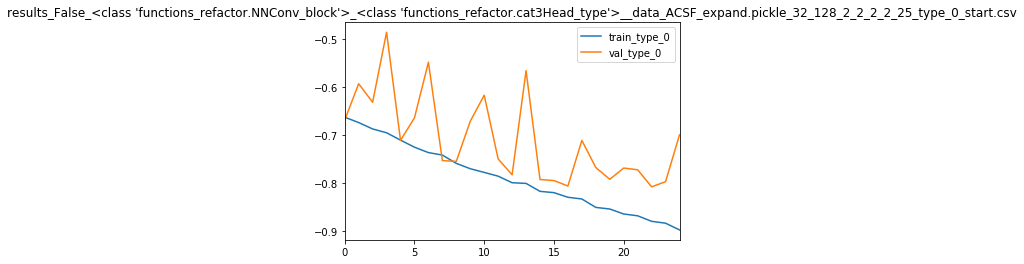

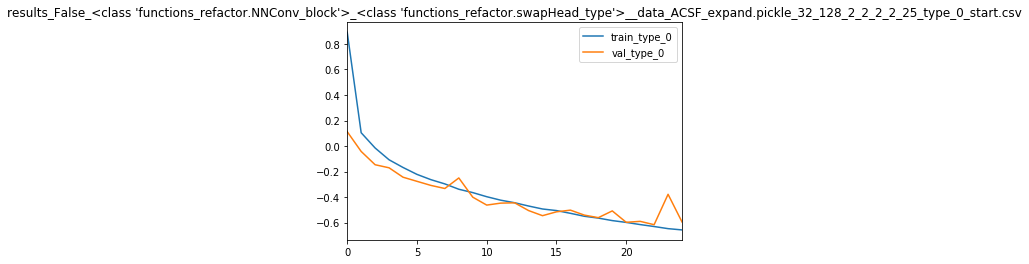

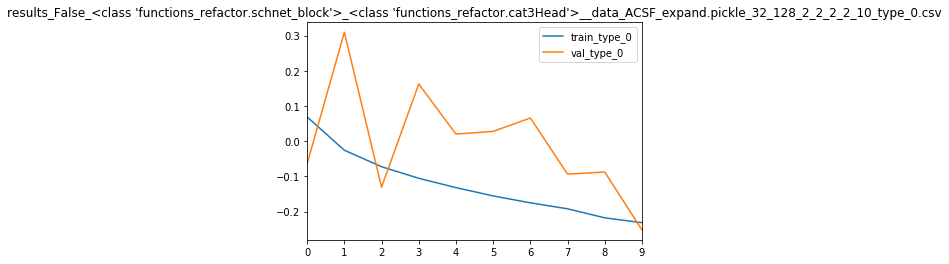

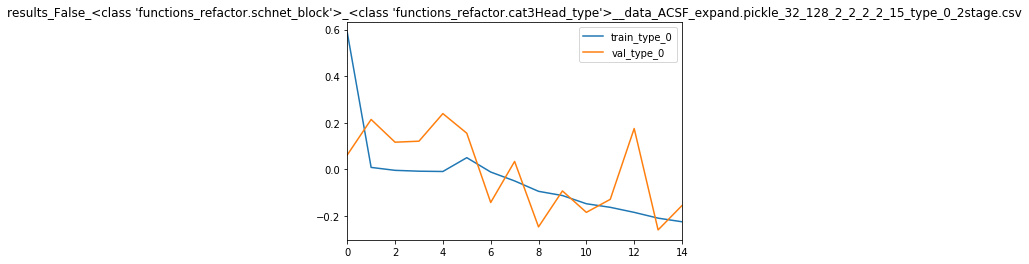

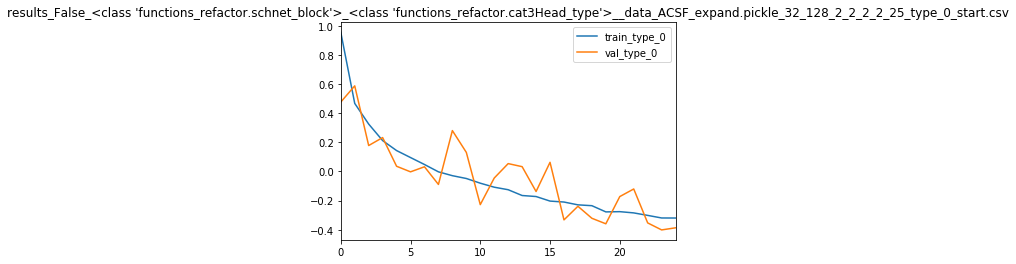

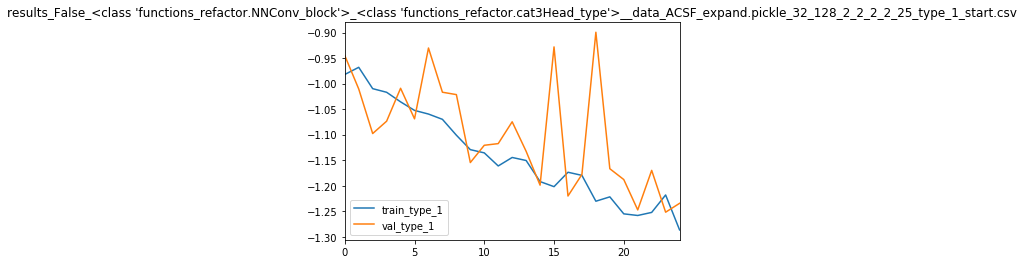

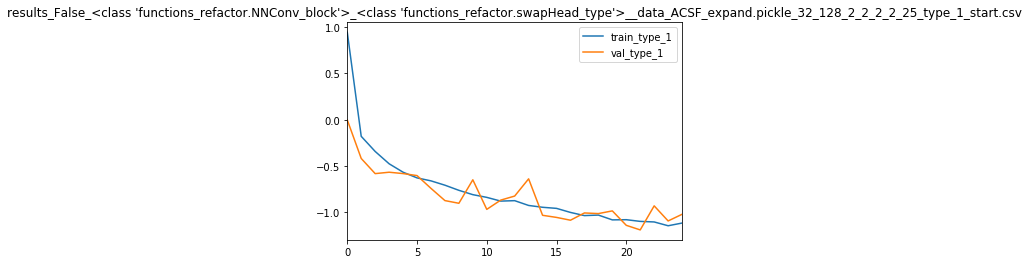

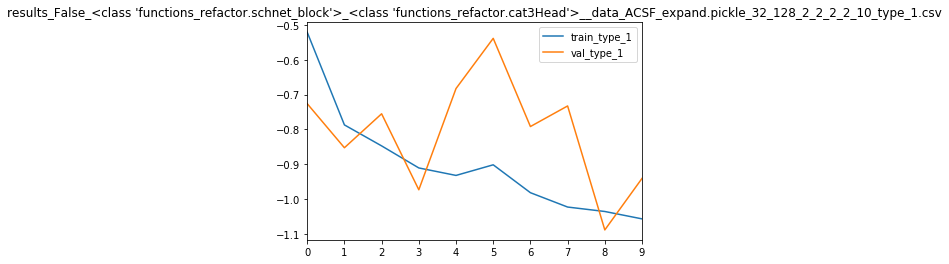

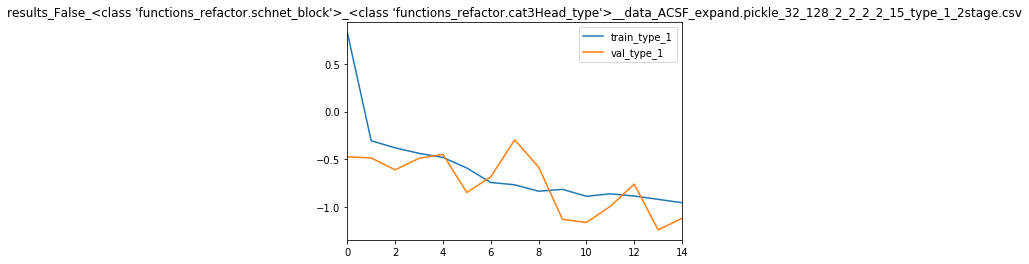

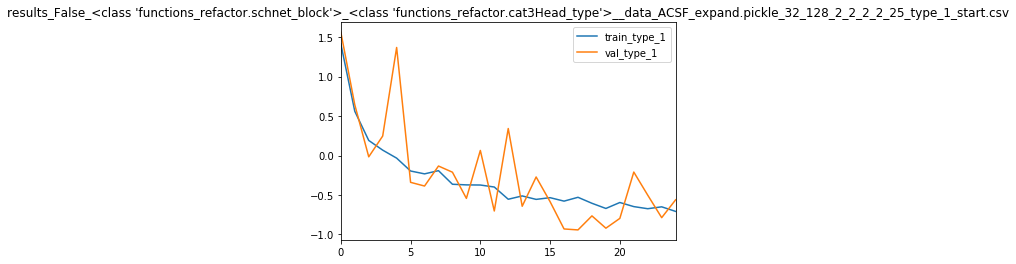

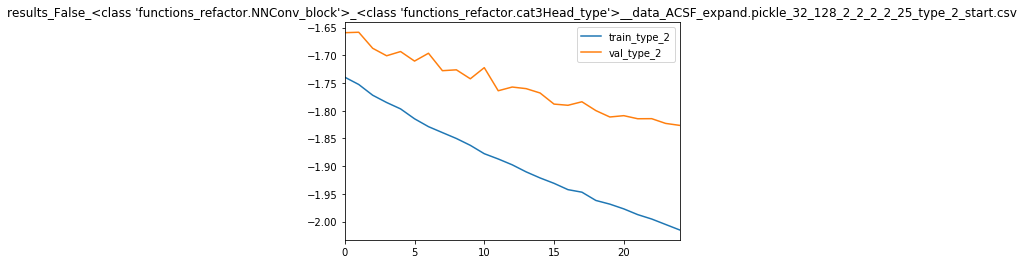

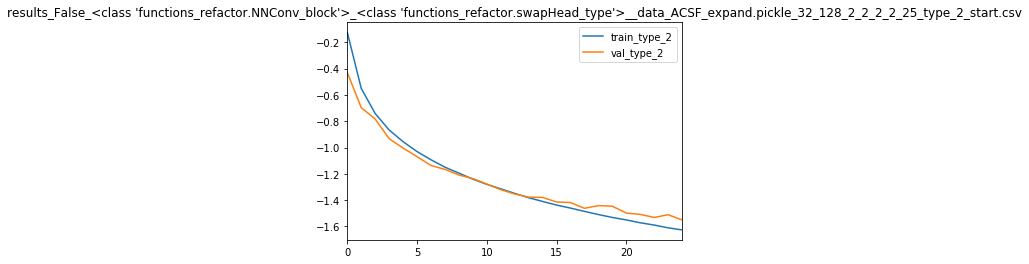

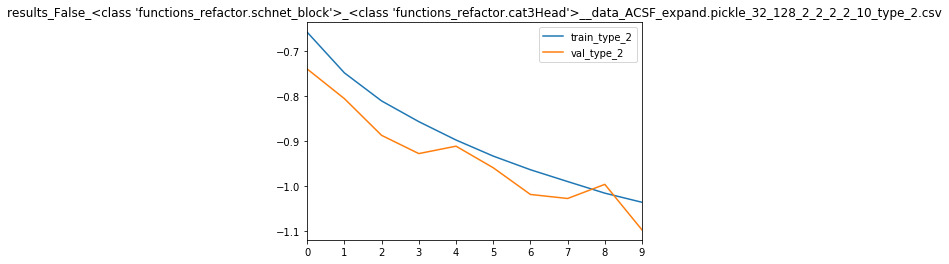

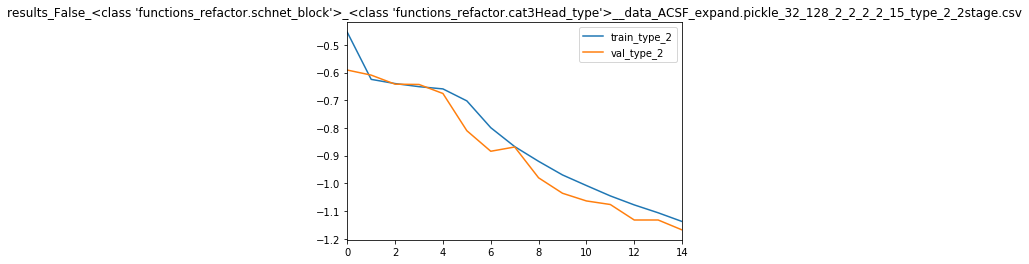

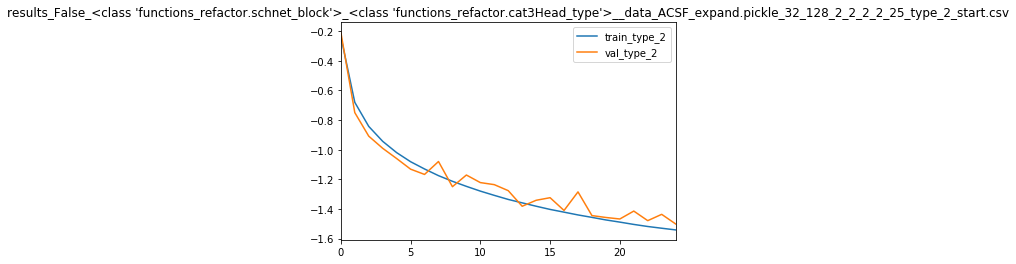

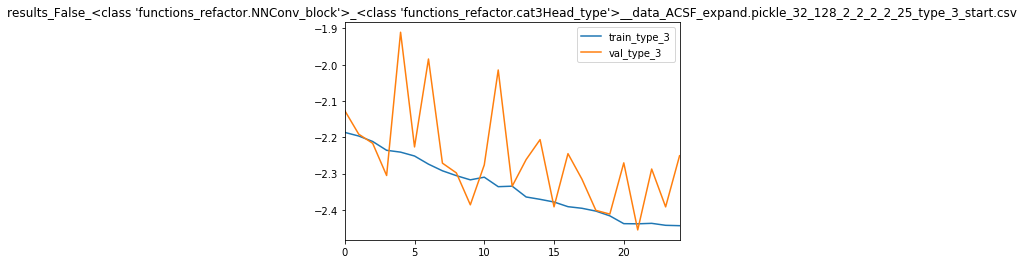

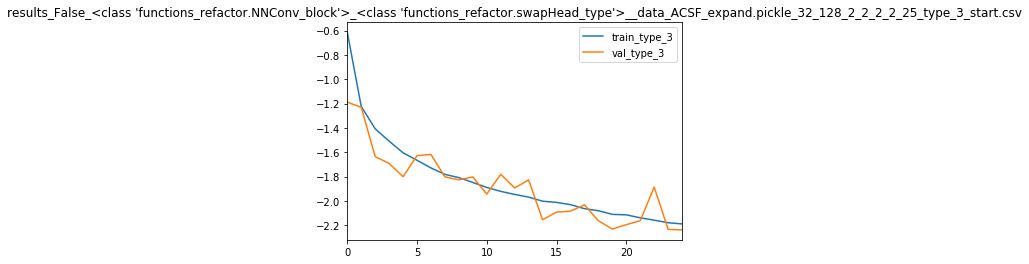

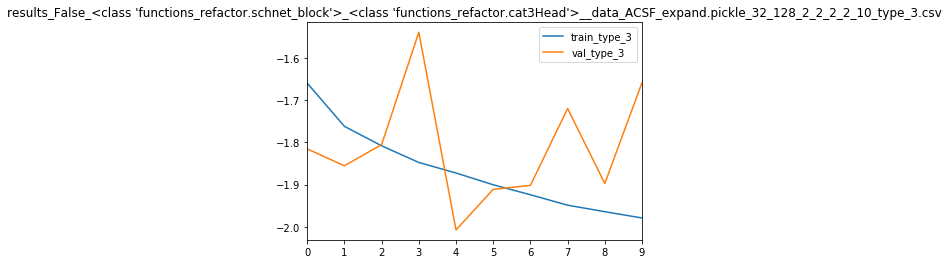

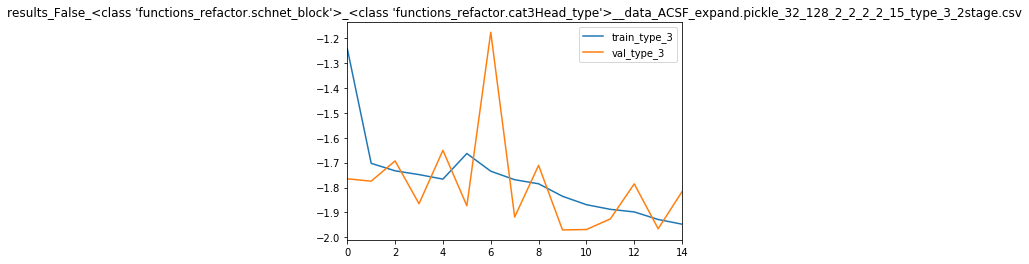

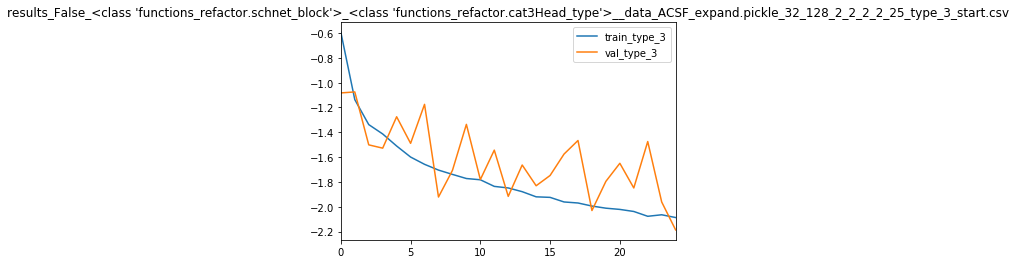

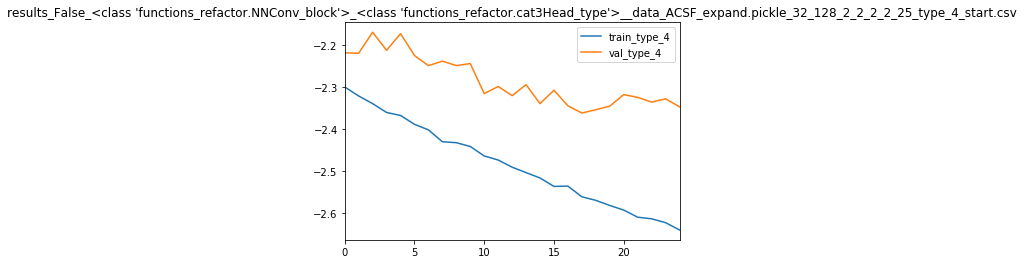

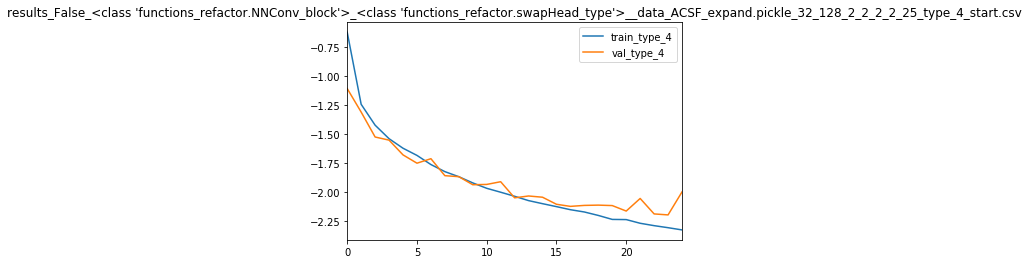

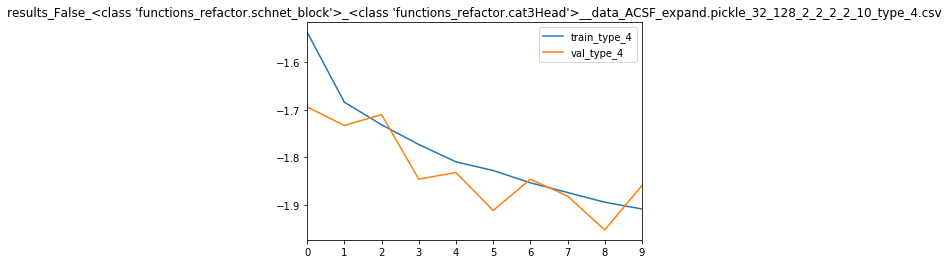

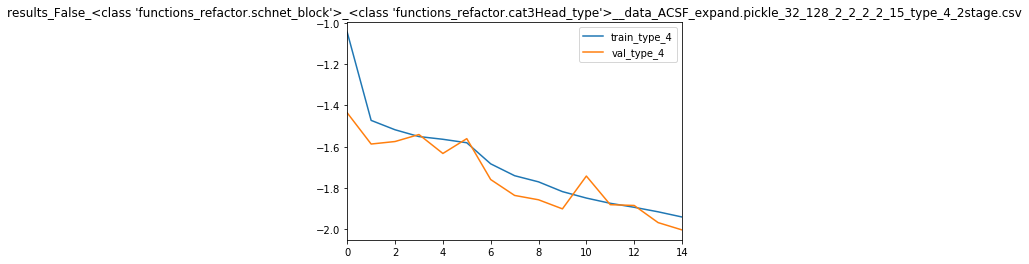

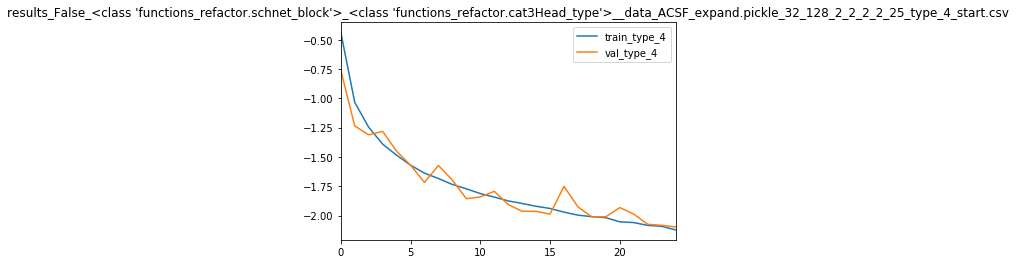

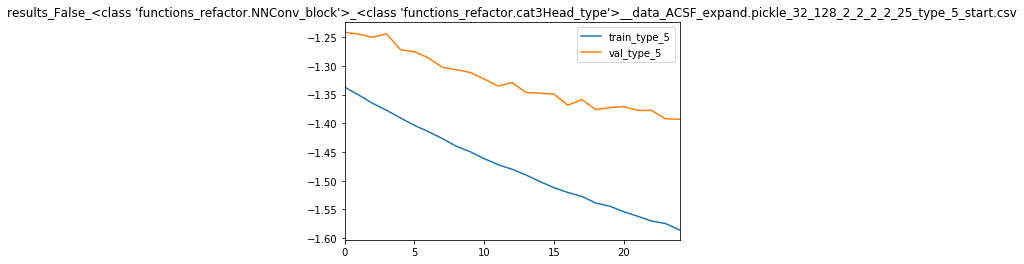

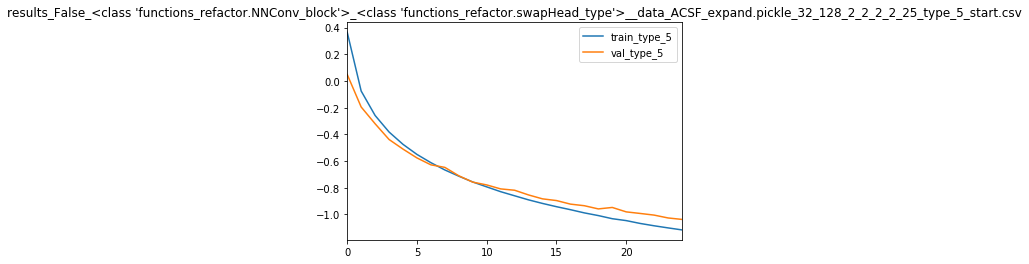

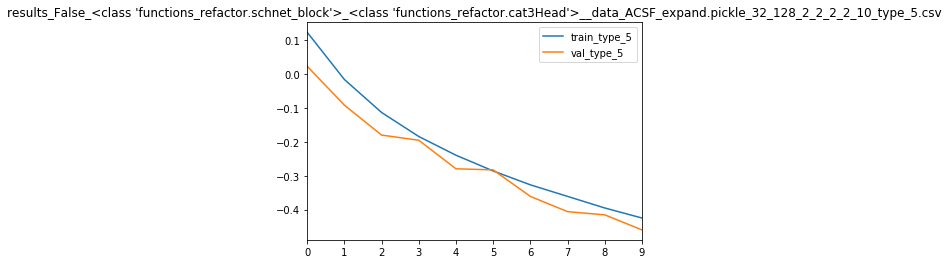

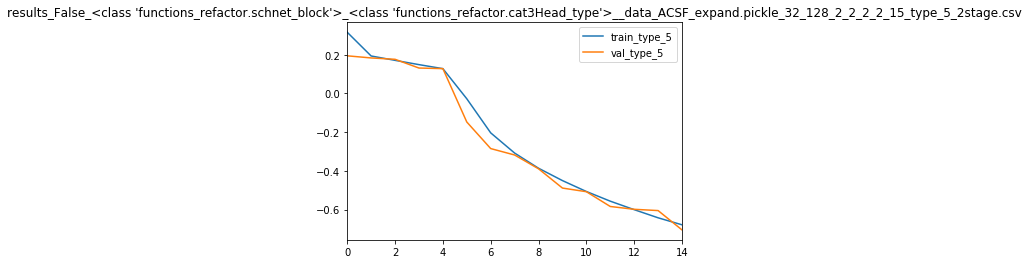

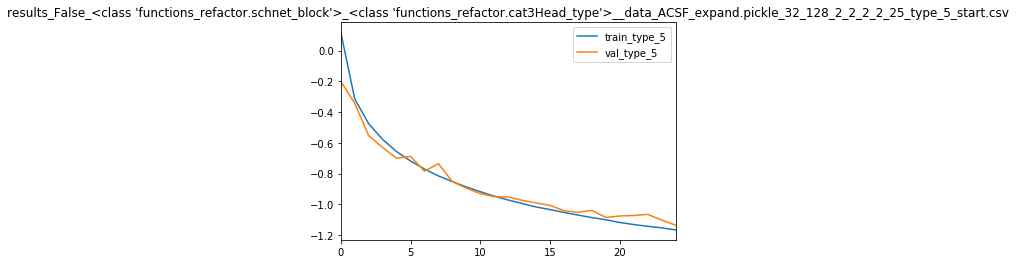

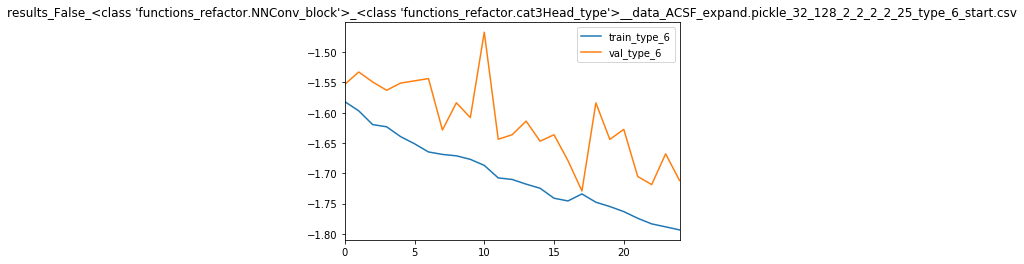

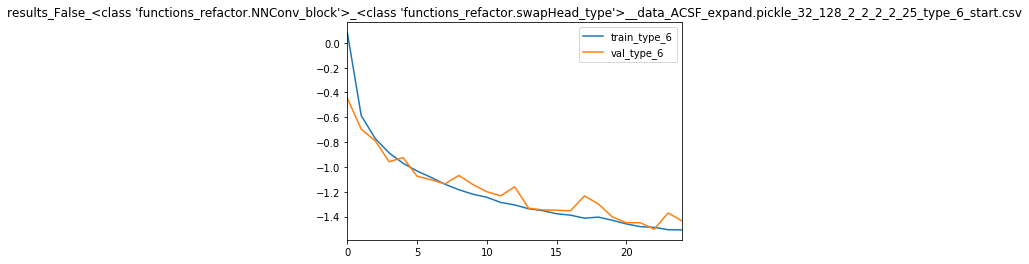

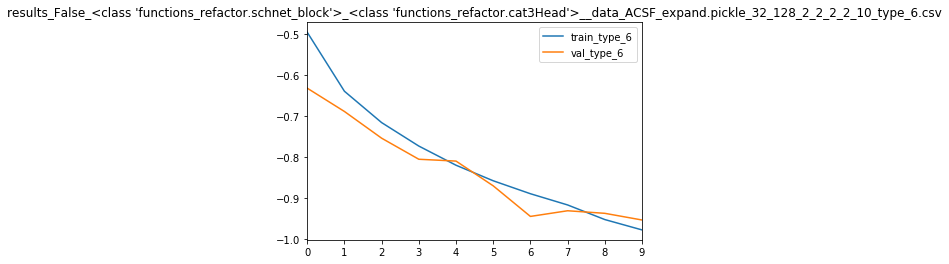

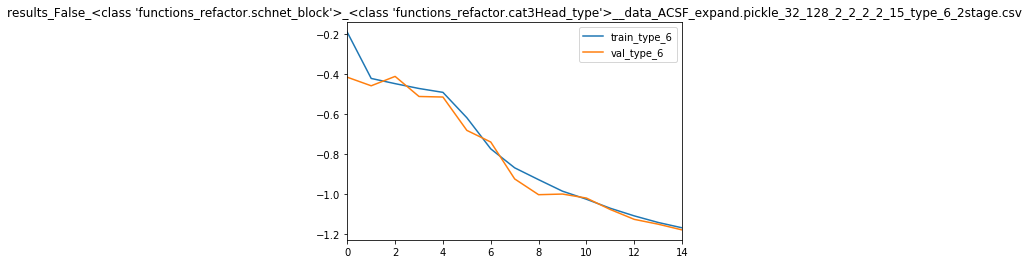

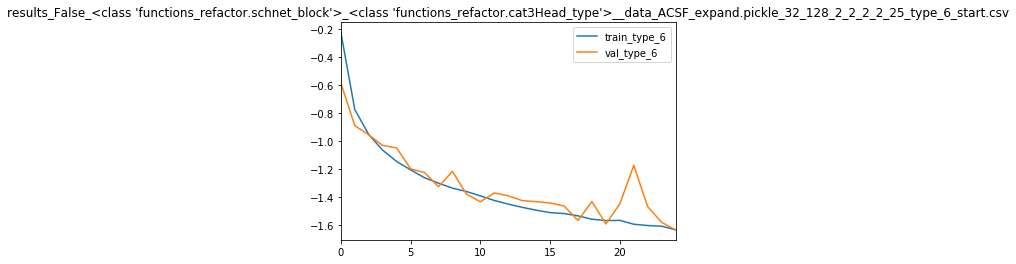

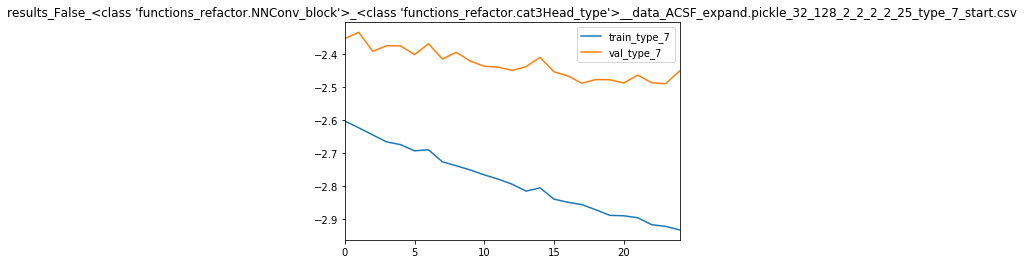

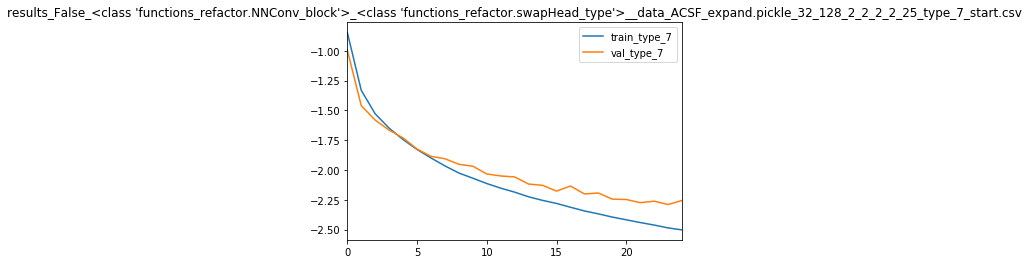

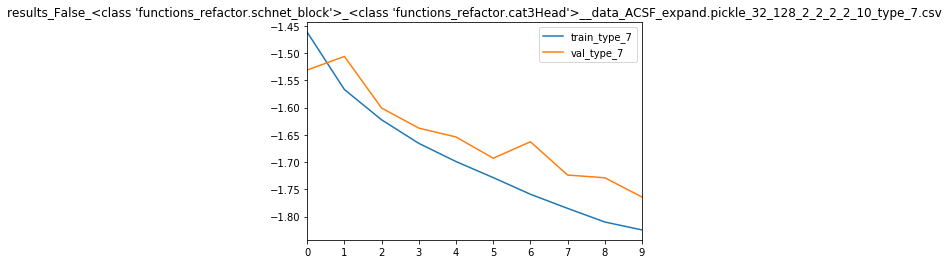

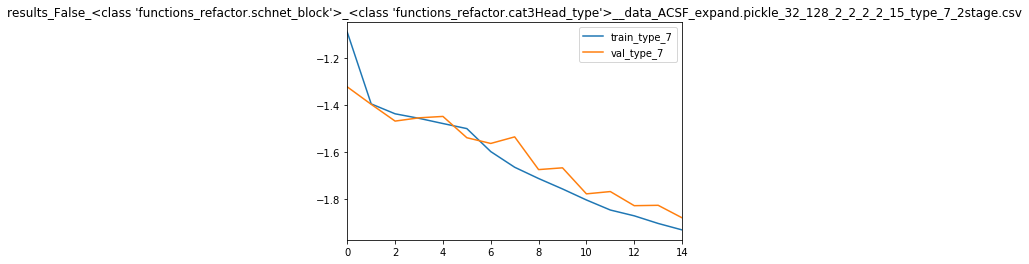

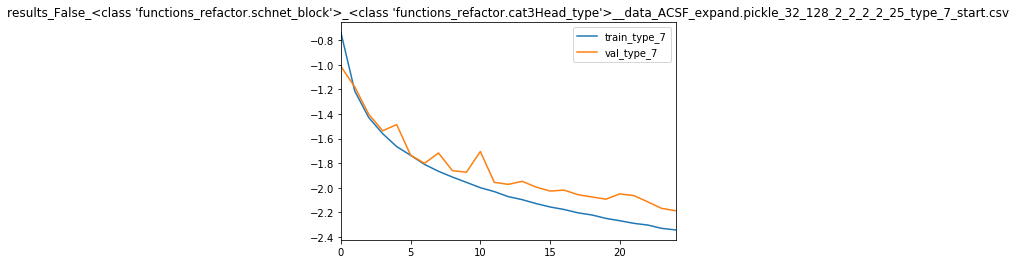

In [6]:
for name,group in gb:
    group[['train_type_'+name[0],'val_type_'+name[0]]].reset_index(drop=True).plot(title=name[1])
    plt.show()

In [16]:
base_all_df = pd.read_csv("../Data/results_False_<class 'functions_refactor.MEGNet_block'>_<class 'functions_refactor.feedforwardHead_Update'>__data_ACSF_expand_PCA.pickle_32_128_0.4_3_3_2_20_base.csv")

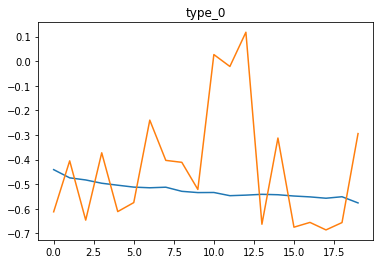

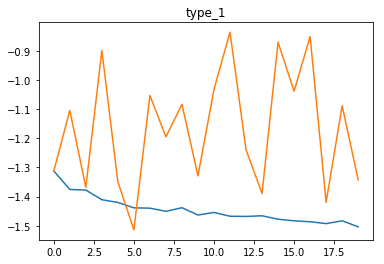

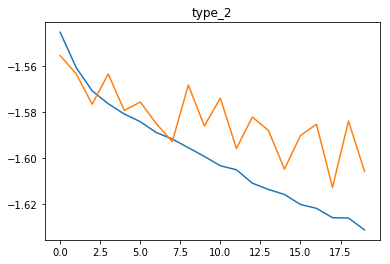

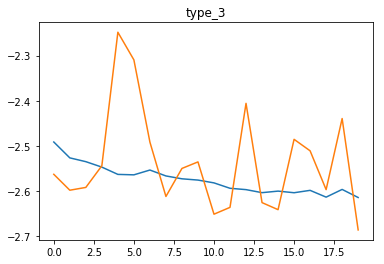

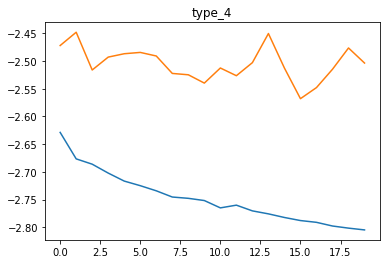

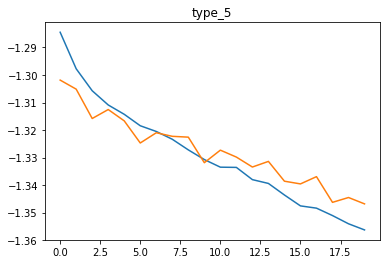

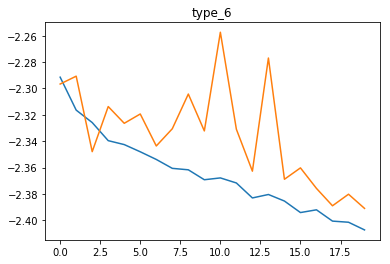

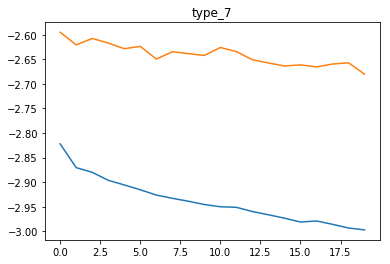

In [19]:
for i in range(8):
    plt.plot(base_all_df['train_type_'+str(i)])
    plt.plot(base_all_df['val_type_'+str(i)])
    plt.title('type_'+str(i))
    plt.show()